# RHEA TPAD H2 burn


This notebook shows the results of the TPAD hybrid ful cell model for each discipline: geometry, aerpodynamics, weights, CG and perfromance.




In [49]:
import numpy as np
import pandas as pd
import os.path as pth
import matplotlib.pyplot as plt
from fastoad.io import VariableIO
import sys
sys.path.append('C:\\Users\\LA202059\\Desktop\\RHEA')
import fastoad.utils.postprocessing.analysis_and_plots as analysis_and_plots
from rhea.utils.postprocessing.analysis_and_plots_RHEA import wing_geometry_plot, \
drag_polar_plot, mass_breakdown_sun_plot,mass_breakdown_bar_plot, aircraft_geometry_plot,payload_range_plot,plot_double,drag_breakdown_sun_plot,drag_breakdown_bar_plot,loading_diagram_plot
from scipy import constants
from fastoad.utils.physics import Atmosphere
from fastoad.utils.postprocessing import VariableViewer


In [50]:
DATA_FOLDER_PATH = 'data'
WORK_FOLDER_PATH = 'workdir'

results_folder='TPAD/TPAD_H2burn/TPAD_H2burn_0.0blend'
RESULTS_FOLDER_PATH =WORK_FOLDER_PATH+'/'+results_folder+'/sizing'
RESULTS_DOC_FOLDER_PATH =WORK_FOLDER_PATH+'/'+results_folder+'/DOC'
RESULT_FILE = pth.join(RESULTS_FOLDER_PATH,'problem_outputs.xml' )

ref_folder='TPAD_baseline_ref_ML_L1'
REF_FOLDER_PATH =WORK_FOLDER_PATH+'/'+ref_folder+'/sizing'
REF_DOC_FOLDER_PATH =WORK_FOLDER_PATH+'/'+ref_folder+'/DOC/200NM_maxcrdiv_FL100_Thrust_rate_descent=0.1_at_MTOW'
REF_FILE = pth.join(REF_DOC_FOLDER_PATH,'problem_outputs.xml' )


In [33]:
fig1 = aircraft_geometry_plot(RESULT_FILE, name='TPAD_hybrid')
#fig1 = aircraft_geometry_plot(REF_FILE, name='TPAD_baseline',fig=fig1)

fig1.show()

## 3. Mass breakdown

In [51]:
fig = mass_breakdown_sun_plot(RESULT_FILE)
fig.show()
fig = mass_breakdown_sun_plot(pth.join(REF_FOLDER_PATH,'problem_outputs.xml' ))
fig.show()


## 5. Mission performance


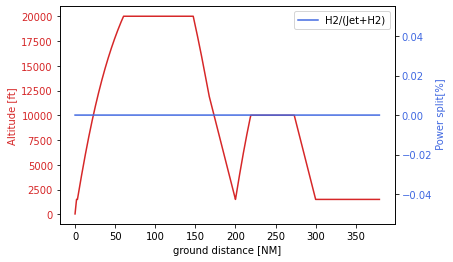

In [52]:
flight_data_sizing= pd.read_csv(pth.join(RESULTS_FOLDER_PATH,'flight_points.csv' ))

color = 'tab:red'

fig, ax1 = plt.subplots()
ax1.set_xlabel('ground distance [NM]')
ax1.set_ylabel('Altitude [ft]', color=color)
ax1.plot(flight_data_sizing.ground_distance/constants.nautical_mile, flight_data_sizing.altitude/constants.foot,color=color)

ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.tick_params(axis='y', labelcolor='royalblue')
ax2.set_ylabel(' Power split[%]', color='royalblue')
#ax2.plot(flight_data_sizing.ground_distance/constants.nautical_mile, flight_data_sizing.TPshaft_power/constants.hp/2,'--',color='royalblue',label='Gasturbine Power')
#ax2.plot(flight_data_sizing.ground_distance/constants.nautical_mile, flight_data_sizing.fuel_mass,'-.',color='royalblue',label='Jet A mass')
#ax2.plot(flight_data_sizing.ground_distance/constants.nautical_mile, round((flight_data_sizing.H2_mass*33.33)/ (flight_data_sizing.fuel_mass*11.889 + (flight_data_sizing.H2_mass*33.33)),2)*100,'-',color='royalblue',label='H2/(Jet+H2)')
ax2.plot(flight_data_sizing.ground_distance/constants.nautical_mile, round((flight_data_sizing.H2_fc*33.33)/ (flight_data_sizing.psfc*flight_data_sizing.TPshaft_power*11.889 + (flight_data_sizing.H2_fc*33.33)),2)*100,'-',color='royalblue',label='H2/(Jet+H2)')

ax2.legend(loc='upper right')




data =round((flight_data_sizing.H2_fc)/ (flight_data_sizing.psfc*flight_data_sizing.TPshaft_power + (flight_data_sizing.H2_fc)),2)*100


### 1. Take off

In [ ]:
flight_data_to= pd.read_csv(pth.join(RESULTS_FOLDER_PATH,'TO_flight_points.csv' ))
flight_data_to= flight_data_to[flight_data_to.name=="take off"]
vv = VariableViewer()
#vv.display()
vv.load(RESULT_FILE)
results=vv.get_variables()
V_1=results["data:mission:sizing:takeoff:V_1"].value
V_EF=results["data:mission:sizing:takeoff:V_EF"].value
V_2=results["data:mission:sizing:takeoff:V_2"].value
V_liftoff=results["data:mission:sizing:takeoff:V_liftoff"].value
V_rotate=results["data:mission:sizing:takeoff:V_rotate"].value
V_MCA=results["data:mission:sizing:takeoff:V_MCA"].value
TOFL=results["data:mission:sizing:takeoff:TOFL"].value
print('TOFL',round(TOFL),'m')
print('TODn-1',round(float(flight_data_to.ground_distance.values[-1])),'m', 'V_1',round(float(V_1),1),' V_EF',round(float(V_EF),1))

fp_v2 = flight_data_to[flight_data_to.true_airspeed<=V_2].iloc[-1]
fp_vlo = flight_data_to[flight_data_to.true_airspeed>=V_liftoff].iloc[0]
fp_vr = flight_data_to[flight_data_to.true_airspeed>=V_rotate].iloc[0]
fp_vmca = flight_data_to[flight_data_to.true_airspeed>=V_MCA].iloc[0]

color = 'tab:red'

fig, ax1 = plt.subplots()
ax1.set_xlabel('ground distance [m]')
ax1.set_ylabel('Altitude [ft]', color=color)
ax1.plot(flight_data_to.ground_distance, flight_data_to.altitude/constants.foot,
          [fp_v2.ground_distance,fp_vlo.ground_distance,fp_vr.ground_distance,fp_vmca.ground_distance],
          [fp_v2.altitude/constants.foot,fp_vlo.altitude/constants.foot,fp_vr.altitude/constants.foot,fp_vmca.altitude/constants.foot],'bs',color=color)
ax1.text(fp_v2.ground_distance,fp_v2.altitude/constants.foot,'v2\n'+ str(round(V_2,1))).set_y(30)
ax1.text(fp_vlo.ground_distance,fp_vlo.altitude/constants.foot,'vlo\n'+ str(round(V_liftoff,1))).set_y(2)
ax1.text(fp_vr.ground_distance,fp_vr.altitude/constants.foot,'vr\n'+ str(round(V_rotate,1))).set_y(2)
ax1.text(fp_vmca.ground_distance,fp_vmca.altitude/constants.foot,'vmca\n'+ str(round(V_MCA,1))).set_y(2)

ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.tick_params(axis='y', labelcolor='royalblue')
ax2.set_ylabel('[deg]', color='royalblue')
ax2.plot(flight_data_to.ground_distance, flight_data_to.slope_angle/constants.degree,'--',color='royalblue',label='Slope angle')
ax2.plot(flight_data_to.ground_distance, flight_data_to.alpha/constants.degree,color='royalblue',label='Angle of Attack')
ax2.legend(loc='upper left')

plot_double(flight_data_to.ground_distance,flight_data_to.thrust,flight_data_to.altitude/constants.foot,'ground_distance (m)','thrust [N] (both sides)','Altitude [ft]')
plot_double(flight_data_to.ground_distance,flight_data_to.EMshaft_power/constants.hp,flight_data_to.TPshaft_power/constants.hp,'ground_distance (m)','EM Shaft power [hp] (both sides)','TP Shaft power [hp] (both sides)')
plot_double(flight_data_to.ground_distance,flight_data_to.shaft_power/constants.hp,flight_data_to.altitude/constants.foot,'ground_distance (m)','Shaft power [hp] (both sides)','Altitude [ft]')

#plot_double(flight_data_to.time,flight_data_to.thrust,flight_data_to.altitude/constants.foot,'time (s)','thrust [N] (both sides)','Altitude [ft]')
#plot_double(flight_data_to.time,flight_data_to.alpha/constants.degree,flight_data_to.slope_angle/constants.degree,'time (s)','alpha [deg] ','gamma [deg]')
#plot_double(flight_data_to.ground_distance,flight_data_to.alpha/constants.degree,flight_data_to.altitude/constants.foot,'distance (m)','alpha [deg] ','gamma [deg]')
print(flight_data_to.thrust.iloc[0],
flight_data_to.TP_residual_thrust.iloc[0])

In [ ]:
flight_data_to= pd.read_csv(pth.join(RESULTS_FOLDER_PATH,'TO_flight_points.csv' ))
flight_data_to= flight_data_to[flight_data_to.name=="ASD"]
plot_double(flight_data_to.ground_distance,flight_data_to.true_airspeed,flight_data_to.acceleration,'distance (m)','TAS [m/s] ','acceleration [m/s**2]')
plot_double(flight_data_to.ground_distance,flight_data_to.thrust,flight_data_to.TPshaft_power/constants.hp,'distance (m)','thrust [N] ','SHP_gt [hp]')
plot_double(flight_data_to.ground_distance,flight_data_to.EMshaft_power/constants.hp,flight_data_to.TPshaft_power/constants.hp,'ground_distance (m)','EM Shaft power [hp] (both sides)','TP Shaft power [hp] (both sides)')


time_v1 = float(flight_data_to[flight_data_to.engine_setting == 8]['time'].iloc[0]+1)
flight_point_v1 = flight_data_to.loc[flight_data_to.time == time_v1]
ASD = flight_data_to.ground_distance.values[-1] + flight_point_v1.equivalent_airspeed*2  #+2sec at v1
print('ASDn-1',round(float(ASD)),'m')
flight_data_to.thrust.values[-1]

### 1.1 OEI Climb

In [ ]:
'''flight_data_OEI= pd.read_csv(pth.join(RESULTS_FOLDER_PATH,'flight_points_OEI.csv' ))
flight_data_OEI=flight_data_OEI[flight_data_OEI.RC_penalty>0.254]
plt.plot(flight_data_OEI.ground_distance, flight_data_OEI.altitude,'g-',flight_data_OEI.ground_distance, flight_data_OEI.altitude_penalty)
plt.show()
plot_double(flight_data_OEI.time/60,flight_data_OEI.shaft_power/constants.hp,flight_data_OEI.thrust,'time (min)','SHP_tot [hp]','Thrust [N]')
plot_double(flight_data_OEI.time/60,flight_data_OEI.thrust,flight_data_OEI.TP_residual_thrust,'time (min)','Thrust [N]','jet_Thrust [N]')

flight_data_OEI.altitude_penalty.iloc[-1]'''

### 2. Climb

REF TTC 16.81 min
REF Fuel climb 255.27 kg
RHEA TTC 16.85 min
RHEA Fuel climb 255.75 kg


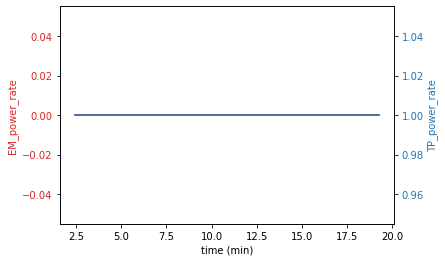

In [53]:
############# REF RESULTS ##########
flight_data_ref= pd.read_csv(pth.join(REF_DOC_FOLDER_PATH,'DOC_flight_points.csv' ))
#flight_data_ref= pd.read_csv(pth.join(REF_FOLDER_PATH,'flight_points.csv' ))

FL=flight_data_ref.altitude.max()
flight_data_climb_ref = flight_data_ref[flight_data_ref.name=='climb']
#remove the points of climb that are actually cruise (acceleration to cruise mach)
flight_data_climb_ref = flight_data_climb_ref[flight_data_climb_ref.time<=flight_data_ref.loc[flight_data_ref['altitude']==FL, ['time']].values[0][0]]

TTC=flight_data_climb_ref.time.values[-1]-flight_data_climb_ref.time.values[0]
print('REF TTC',round(TTC/60,2), 'min')

Fuel_climb= flight_data_climb_ref[flight_data_climb_ref.name=='climb'].fuel_mass.values[-1]-flight_data_climb_ref[flight_data_climb_ref.name=='climb'].fuel_mass.values[0]
print('REF Fuel climb',round(Fuel_climb,2),'kg')

############# HYBRID RESULTS ##########

flight_data_sizing= pd.read_csv(pth.join(RESULTS_FOLDER_PATH,'flight_points.csv' ))
FL=flight_data_sizing.altitude.max()
flight_data_climb = flight_data_sizing[flight_data_sizing.name=='climb']
#remove the points of climb that are actually cruise (acceleration to cruise mach)
flight_data_climb = flight_data_climb[flight_data_climb.time<=flight_data_sizing.loc[flight_data_sizing['altitude']==FL, ['time']].values[0][0]]

TTC=flight_data_climb.time.values[-1]-flight_data_climb.time.values[0]
print('RHEA TTC',round(TTC/60,2), 'min')

Fuel_climb= flight_data_climb[flight_data_climb.name=='climb'].fuel_mass.values[-1]-flight_data_climb[flight_data_climb.name=='climb'].fuel_mass.values[0]
print('RHEA Fuel climb',round(Fuel_climb,2),'kg')


plot_double(flight_data_climb.time/60,round(flight_data_climb.EM_power_rate,3),flight_data_climb.TP_power_rate,'time (min)','EM_power_rate','TP_power_rate')


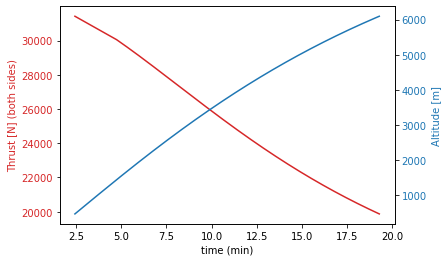

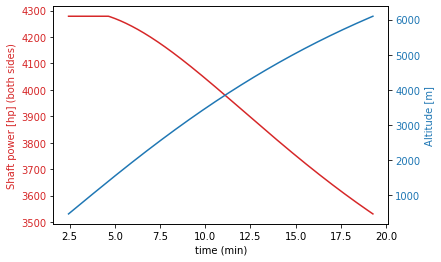

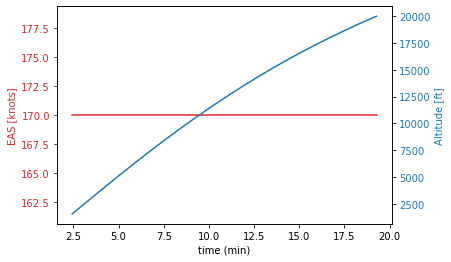

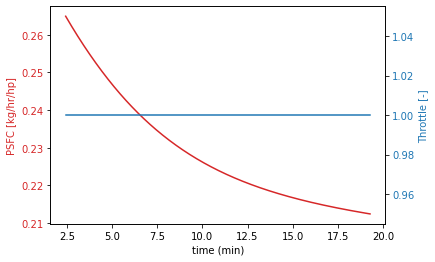

In [54]:
plot_double(flight_data_climb.time/60,flight_data_climb.thrust,flight_data_climb.altitude,'time (min)','Thrust [N] (both sides)','Altitude [m]')
plot_double(flight_data_climb.time/60,flight_data_climb.TPshaft_power/constants.hp,flight_data_climb.altitude,'time (min)','Shaft power [hp] (both sides)','Altitude [m]')
plot_double(flight_data_climb.time/60,flight_data_climb.equivalent_airspeed/constants.knot,flight_data_climb.altitude/constants.foot,'time (min)','EAS [knots]','Altitude [ft]')

plot_double(flight_data_climb.time/60,flight_data_climb.psfc*constants.hour*constants.hp,flight_data_climb.TP_power_rate,'time (min)','PSFC [kg/hr/hp]','Throttle [-]')


### 3. Cruise

Reference specific range at 6096.0 ft @ 23244.7 TOW is 0.399 nm/kg @ 0.476 mach
Reference cruise fuel consumption 218.01 kg cruise distance 87.03 nm
RHEA specific range at 6096.0 ft @ 23267.2 TOW is 0.399 nm/kg @ 0.475 mach
RHEA cruise fuel consumption 217.75 kg cruise distance 86.9 nm


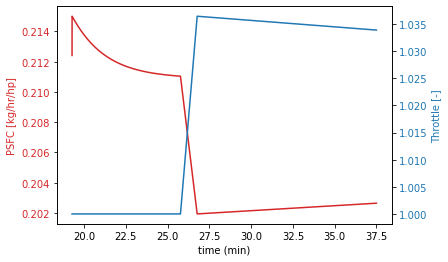

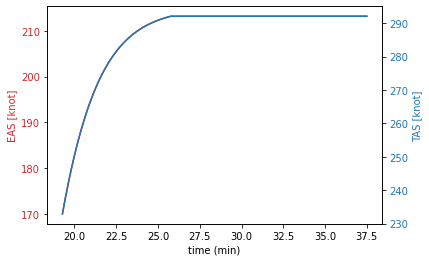

1.0338961715196024

In [55]:

########## REF Results ################
TOW_ref = flight_data_ref.mass.max()
FL_ref=flight_data_ref.altitude.max()
flight_data_cruise_ref=flight_data_ref[flight_data_ref.altitude==FL_ref]
TOW_ref = flight_data_cruise_ref.mass.max()

max_mach=flight_data_cruise_ref.mach.values[-1]
cruise_fuel=(flight_data_cruise_ref.fuel_mass.values[-1]-flight_data_climb_ref.fuel_mass.values[-1])
cruise_distance=(flight_data_cruise_ref.ground_distance.values[-1]-flight_data_climb_ref.ground_distance.values[-1])
max_SR = cruise_distance/constants.nautical_mile/cruise_fuel

print('Reference specific range at',round(FL_ref,1),'ft','@',round(TOW_ref,1),'TOW', 'is',round(max_SR,3),'nm/kg','@',round(max_mach,3),'mach')
print('Reference cruise fuel consumption',round(cruise_fuel,2),'kg','cruise distance',round(cruise_distance/constants.nautical_mile,2),'nm')


############# RHEA RESULTS ##########
#TOW = flight_data_sizing.mass.max()
FL=flight_data_sizing.altitude.max()
flight_data_cruise=flight_data_sizing[flight_data_sizing.altitude==FL]
TOW = flight_data_cruise.mass.max()
max_mach_rhea=flight_data_cruise.mach.values[-1]
cruise_fuel=(flight_data_cruise.fuel_mass.values[-1]-flight_data_climb.fuel_mass.values[-1])
cruise_distance=(flight_data_cruise.ground_distance.values[-1]-flight_data_climb.ground_distance.values[-1])
max_SR_rhea = cruise_distance/constants.nautical_mile/cruise_fuel
print('RHEA specific range at',round(FL,1),'ft','@',round(TOW,1),'TOW', 'is',round(max_SR_rhea,3),'nm/kg','@',round(max_mach_rhea,3),'mach')
print('RHEA cruise fuel consumption',round(cruise_fuel,2),'kg','cruise distance',round(cruise_distance/constants.nautical_mile,2),'nm')
plot_double(flight_data_cruise.time/60,flight_data_cruise.psfc*constants.hour*constants.hp,flight_data_cruise.TP_power_rate,'time (min)','PSFC [kg/hr/hp]','Throttle [-]')
plot_double(flight_data_cruise.time/60,flight_data_cruise.equivalent_airspeed/constants.knot,flight_data_cruise.true_airspeed/constants.knot,'time (min)','EAS [knot]','TAS [knot]')
flight_data_cruise.equivalent_airspeed.values[-1]/constants.knot
flight_data_cruise.TP_power_rate.values[-1]

### 4. Descent

Reference fuel consumption in descent at 250.0  knots is  75.31 kg
RHEA fuel consumption in descent at 250.0  knots is  75.26 kg


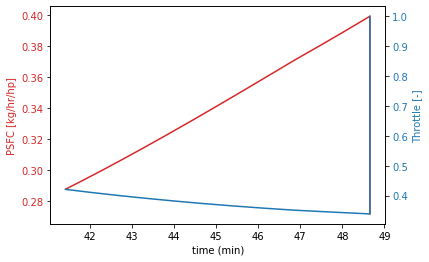

In [56]:

##########  REF RESULTS ################

flight_data_descent_ref = flight_data_ref[flight_data_ref.name=='descent']
descent_speed=flight_data_descent_ref.equivalent_airspeed.values[-2]/constants.knot
descent_fuel=flight_data_descent_ref.fuel_mass.values[-2]-flight_data_cruise_ref.fuel_mass.values[-1]
print('Reference fuel consumption in descent', 'at',round(descent_speed,0),' knots is ',round(descent_fuel,2),'kg')

############# RHEA RESULTS ##########
flight_data_descent = flight_data_sizing[flight_data_sizing.name=='descent']
descent_speed=flight_data_descent.equivalent_airspeed.values[-2]/constants.knot
descent_fuel=flight_data_descent.fuel_mass.values[-2]-flight_data_cruise.fuel_mass.values[-1]




print('RHEA fuel consumption in descent', 'at',round(descent_speed,0),' knots is ',round(descent_fuel,2),'kg')

ff=flight_data_descent.psfc.values[:-1] * flight_data_descent.TPshaft_power.values[:-1]/2 #kg/s
plot_double(flight_data_descent.time/60,flight_data_descent.psfc*constants.hour*constants.hp,flight_data_descent.TP_power_rate,'time (min)','PSFC [kg/hr/hp]','Throttle [-]')


Acceleration descent


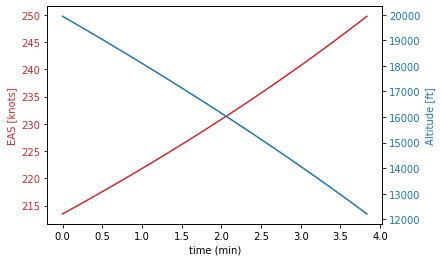

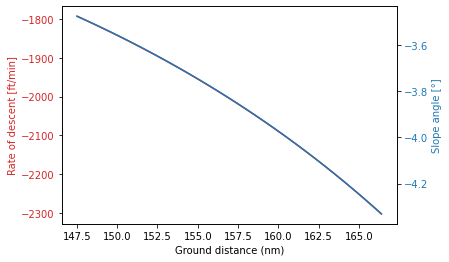

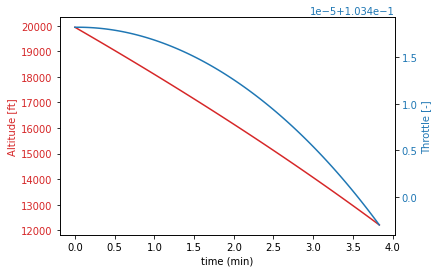

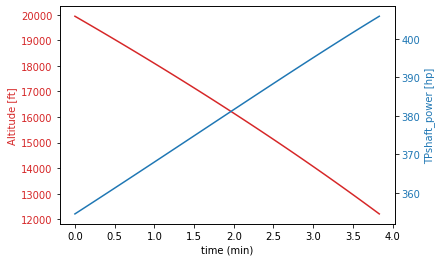

Constant slope descent


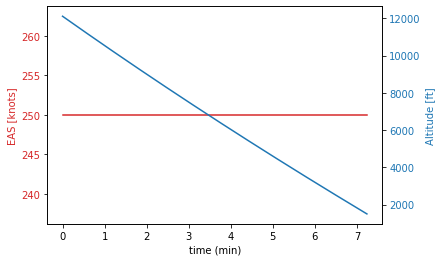

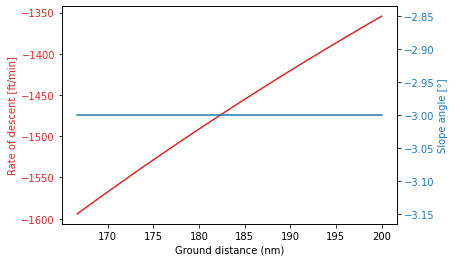

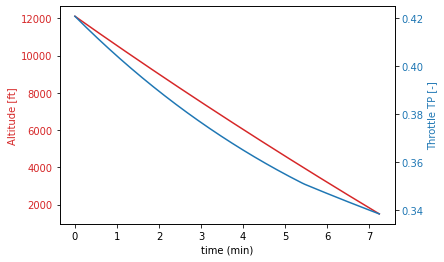

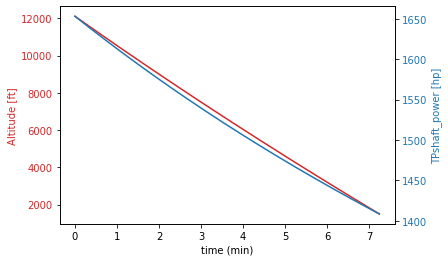

In [58]:
flight_data_acc_descent = flight_data_sizing[flight_data_sizing.name=='acceleration descent']
#acc descent
print('Acceleration descent')
plot_double(flight_data_acc_descent.time.values[:-1]/60-flight_data_acc_descent.time.values[0]/60,flight_data_acc_descent.equivalent_airspeed.values[:-1]/constants.knot,flight_data_acc_descent.altitude.values[:-1]/constants.foot,'time (min)','EAS [knots]','Altitude [ft]')
RD= flight_data_acc_descent.true_airspeed[:-1]*np.sin(flight_data_acc_descent.slope_angle[:-1])
plot_double(flight_data_acc_descent.ground_distance[:-1]/constants.nautical_mile,RD*60/constants.foot,flight_data_acc_descent.slope_angle[:-1]/constants.degree,'Ground distance (nm)','Rate of descent [ft/min]','Slope angle [°]')
plot_double(flight_data_acc_descent.time.values[:-1]/60-flight_data_acc_descent.time.values[0]/60, flight_data_acc_descent.altitude.values[:-1]/constants.foot,flight_data_acc_descent.TP_power_rate[:-1],'time (min)','Altitude [ft]','Throttle [-]')
plot_double(flight_data_acc_descent.time.values[:-1]/60-flight_data_acc_descent.time.values[0]/60, flight_data_acc_descent.altitude.values[:-1]/constants.foot,flight_data_acc_descent.TPshaft_power [:-1]/constants.hp,'time (min)','Altitude [ft]','TPshaft_power [hp]')

#descent

print('Constant slope descent')

plot_double(flight_data_descent.time.values[:-1]/60-flight_data_descent.time.values[0]/60,flight_data_descent.equivalent_airspeed.values[:-1]/constants.knot,flight_data_descent.altitude.values[:-1]/constants.foot,'time (min)','EAS [knots]','Altitude [ft]')
RD= flight_data_descent.true_airspeed[:-1]*np.sin(flight_data_descent.slope_angle[:-1])
plot_double(flight_data_descent.ground_distance[:-1]/constants.nautical_mile,RD*60/constants.foot,flight_data_descent.slope_angle[:-1]/constants.degree,'Ground distance (nm)','Rate of descent [ft/min]','Slope angle [°]')
plot_double(flight_data_descent.time.values[:-1]/60-flight_data_descent.time.values[0]/60, flight_data_descent.altitude.values[:-1]/constants.foot,flight_data_descent.TP_power_rate[:-1],'time (min)','Altitude [ft]','Throttle TP [-]')

plot_double(flight_data_descent.time.values[:-1]/60-flight_data_descent.time.values[0]/60, flight_data_descent.altitude.values[:-1]/constants.foot,flight_data_descent.TPshaft_power [:-1]/constants.hp,'time (min)','Altitude [ft]','TPshaft_power [hp]')


### 5.  Diversion

In [59]:
flight_data_div_climb = flight_data_sizing[flight_data_sizing.name=='diversion climb']

plot_double(flight_data_div_climb.time/60,flight_data_div_climb.shaft_power/constants.hp,flight_data_div_climb.altitude,'time (min)','Shaft power [hp] (both sides)','Altitude [m]')
plot_double(flight_data_div_climb.time/60,flight_data_div_climb.psfc*constants.hour*constants.hp,np.around(flight_data_div_climb.TP_power_rate,1),'time (min)','PSFC [kg/hr/hp]','Throttle [-]')

flight_data_div_cruise = flight_data_sizing[flight_data_sizing.name=='diversion cruise']

plot_double(flight_data_div_cruise.time/60,flight_data_div_cruise.shaft_power/1000,flight_data_div_cruise.altitude,'time (min)','Shaft power [kW] (both sides)','Altitude [m]')
plot_double(flight_data_div_cruise.time/60,flight_data_div_cruise.psfc*constants.hour*constants.hp, flight_data_div_cruise.TP_power_rate,'time (min)','PSFC [kg/hr/hp]','Throttle [-]')

RC= flight_data_div_climb.true_airspeed[:-1]*np.sin(flight_data_div_climb.slope_angle[:-1])
plot_double(flight_data_div_climb.ground_distance[:-1]/constants.nautical_mile,RC*60/constants.foot,flight_data_div_climb[:-1].altitude,'Ground distance (nm)','Rate of climb [ft/min]','Altitude [m]')
RC.values[-1]*60/constants.foot

AttributeError: 'DataFrame' object has no attribute 'shaft_power'

### 6.  Holding

In [ ]:
flight_data_holding = flight_data_sizing[flight_data_sizing.name=='holding']

plot_double(flight_data_holding.time/60,flight_data_holding.TPshaft_power/constants.hp,flight_data_holding.EMshaft_power/constants.hp,'time (min)','TP Shaft power [hp] (both sides)','TP electric power [hp] (both sides)')
plot_double(flight_data_holding.time/60,flight_data_holding.TP_power_rate,flight_data_holding.EM_power_rate,'time (min)','Throttle TP [-]','Throttle EM [-]')



### 5.  Block Fuel

In [60]:

##########  REFERENCE DATA ################

vv = VariableViewer()
vv.load(REF_FILE)
#vv.display()
#vv.load(RESULT_DOC_FILE)
results=vv.get_variables()
BF_ref=results["data:mission:DOC:block_fuel"].value
distance=results["data:mission:DOC:range"].value
Pax=72
BF_pax_ref=BF_ref/Pax
Trip_time_ref= round((results["data:mission:DOC:main_route:climb:duration"].value+ results["data:mission:DOC:main_route:cruise:duration"].value+results["data:mission:DOC:main_route:descent:duration"].value)/60,2)



############# RHEA RESULTS ##########


vv = VariableViewer()
vv.load(RESULT_FILE)
#vv.display()
#vv.load(RESULT_DOC_FILE)
results=vv.get_variables()
BF_hyb=round(results["data:mission:sizing:block_fuel"].value,1)
H2_fuel=results["data:mission:sizing:H2"].value
range_RHEA=results["data:TLAR:range"].value
Pax=results["data:TLAR:NPAX"].value
BF_pax_hyb=round(BF_hyb/Pax,2)
Trip_time= round((results["data:mission:sizing:main_route:climb:duration"].value+ results["data:mission:sizing:main_route:cruise:duration"].value+results["data:mission:sizing:main_route:descent:duration"].value)/60,2)

print('Ref block fuel for',distance/constants.nautical_mile,'nm','is',BF_ref, 'kg', BF_pax_ref, 'kg/pax')
print('Hybrid block fuel for',range_RHEA/constants.nautical_mile,'nm','is',BF_hyb, 'kg',BF_pax_hyb,'kg/pax',(BF_pax_hyb-BF_pax_ref)/BF_pax_ref*100, '%')
print('Ref block fuel for',distance/constants.nautical_mile,'nm','is',Trip_time_ref, 'min')
print('Hybrid trip time for',range_RHEA/constants.nautical_mile,'nm','is',Trip_time, 'min',(Trip_time-Trip_time_ref)/Trip_time_ref*100, '%')

print('PAX',Pax)
print('H2',H2_fuel,'kg')

TTC=flight_data_climb.time.values[-1]-flight_data_climb.time.values[0]
print('RHEA TTC',round(TTC/60,2), 'min')




Ref block fuel for 200.0 nm is 621.0512518543513 kg 8.625711831310435 kg/pax
Hybrid block fuel for 200.0 nm is 621.3 kg 8.63 kg/pax 0.04971379491256081 %
Ref block fuel for 200.0 nm is 46.24 min
Hybrid trip time for 200.0 nm is 46.25 min 0.021626297577850367 %
PAX 72.0
H2 0.0 kg
RHEA TTC 16.85 min


In [ ]:
flight_data_thermo= pd.read_csv(pth.join(RESULTS_FOLDER_PATH,'flight_points_thermo.csv' ))
import ast

#T3=ast.literal_eval(flight_data_thermo.TP_total_temperature.iloc[i])[3]
EI_Nox_list=[]
for i in flight_data_thermo.index:
    T4=ast.literal_eval(flight_data_thermo.TP_total_temperature.iloc[i])[4]
    P3 = (ast.literal_eval(flight_data_thermo.TP_total_pressure.iloc[i])[3]/1000) #kPa
    T3 =ast.literal_eval(flight_data_thermo.TP_total_temperature.iloc[i])[3]
    EI_Nox = 5.4728*10**(-9)*T4*P3**0.37*np.e**(T3/191.67)
    EI_Nox_list.append(EI_Nox)
flight_data_sizing['EI_NOx']=EI_Nox_list
#self.segment_kwargs['time_step']* flight_points.RC_penalty.shift(1)
flight_data_sizing['NOx_delta']=(flight_data_sizing.fuel_mass-flight_data_sizing.fuel_mass.shift(1))*flight_data_sizing.EI_NOx
flight_data_sizing['NOx'] = flight_data_sizing.NOx_delta.cumsum()
flight_data_sizing.to_csv(RESULTS_FOLDER_PATH+'flight_point_NOx.csv')

plot_double(flight_data_sizing.time/60,flight_data_sizing.altitude,flight_data_sizing.NOx*1000,'time (min)','Alt [m]','NOx [g]')
NOx_TO= flight_data_sizing[flight_data_sizing.name=='take off'].NOx.values[-1]*1000
NOx_Incl=flight_data_sizing[flight_data_sizing.name=='initial climb'].NOx.values[-1]*1000
NOx_cl = flight_data_sizing[flight_data_sizing.name=='climb'].NOx.values[-1]*1000
Nox_cr=flight_data_sizing[flight_data_sizing.name=='cruise'].NOx.values[-1]*1000
Nox_desc=flight_data_sizing[flight_data_sizing.name=='descent'].NOx.values[-2]*1000

print(NOx_TO,NOx_Incl,NOx_cl,Nox_cr,Nox_desc)
print('NOx/pax',Nox_desc/Pax)